In [1]:
using Oceananigans
using JLD2
using CairoMakie
using Statistics
using ImageFiltering: imfilter, Kernel.gaussian

[ Info: Oceananigans will use 4 threads


In [19]:
include("src/figures/energy_loss.jl")
include("src/figures/energy_partition.jl")
include("src/figures/frontogenesis_bu.jl")
include("src/figures/frontogenesis_pv.jl")
include("src/figures/streamfunction_terms.jl")
include("src/figures/xt_energy_loss.jl")
include("src/figures/xy_states.jl")
include("src/figures/xz_states.jl")
include("src/figures/zt_energy_loss.jl")

zt_energy_loss (generic function with 1 method)

In [20]:
runname = "Ro08Ri001Ek0A15_1"
runname_long = "Ro08Ri000Ek0A15-long_2"
runnames = ["Ro08Ri000Ek0A15", "Ro08Ri010Ek0A15", "Ro08Ri020Ek0A15"]
runlabels = [L"0.00", L"0.10", L"0.20"]
legendtitle = L"\text{Ri}";

In [18]:
figure_file = jldopen("output/main_figures.jld2", "a+")

JLDFile /gpfs/fs1/home/n/ngrisoua/atkin163/filament-instability/output/main_figures.jld2 (read/write)
  (no datasets)

# Energy loss from thermal wind state

## Fluxes

### Sum

In [24]:
#energy_loss_fig = energy_loss(runnames; resolution=(1500, 500))
figure_file["energy_loss_terms"] = energy_loss_fig
energy_loss_fig

LoadError: Type Module does not have a definite size.

### Horizontal dependence

In [47]:
xt_energy_loss_figs = map(runnames) do runname 
    fig = xt_energy_loss(runname; resolution=(2000, 500))
    save("output/figures_new/xt_energy_loss_$runname.png", fig)
    fig
end

4-element Vector{Figure}:
 Figure()
 Figure()
 Figure()
 Figure()

### Vertical dependence

In [16]:
zt_energy_loss_figs = map(runnames) do runname 
    fig = zt_energy_loss(runname; resolution=(2000, 500))
    save("output/figures_new/zt_energy_loss_$runname.png", fig)
    fig
end

4-element Vector{Figure}:
 Figure()
 Figure()
 Figure()
 Figure()

# Frontogenesis

## Buoyancy and velocity

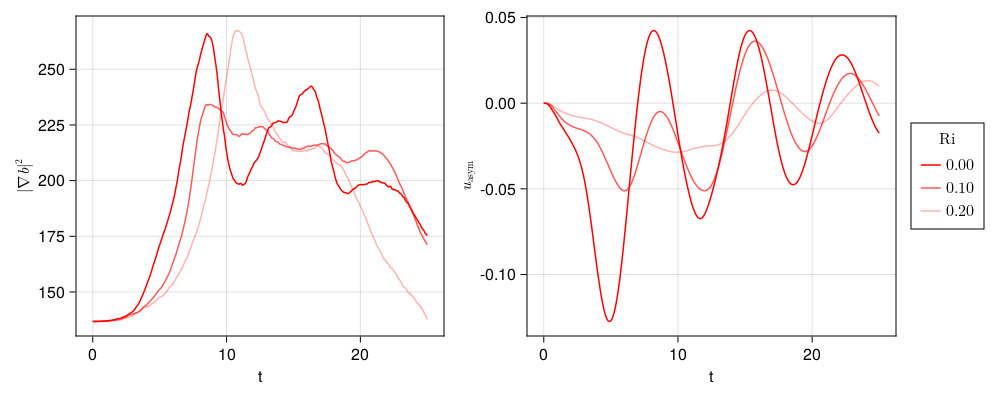

In [25]:
#frontogenesis_bu_fig = frontogenesis_bu(runnames, 118:128, legendtitle, runlabels; σ=0, resolution=(1000, 400))
#figure_file["frontogenesis_bu"] = frontogenesis_bu_fig
#save("output/figures_new/frontogenesis_bu.png", frontogenesis_bu_fig)
frontogenesis_bu_fig

In [17]:
save("output/figures_new/frontogenesis_bu.png", frontogenesis_bu_fig; resolution=(1000, 400), px_per_unit=2)

CairoMakie.Screen{IMAGE}


## Potential vorticity

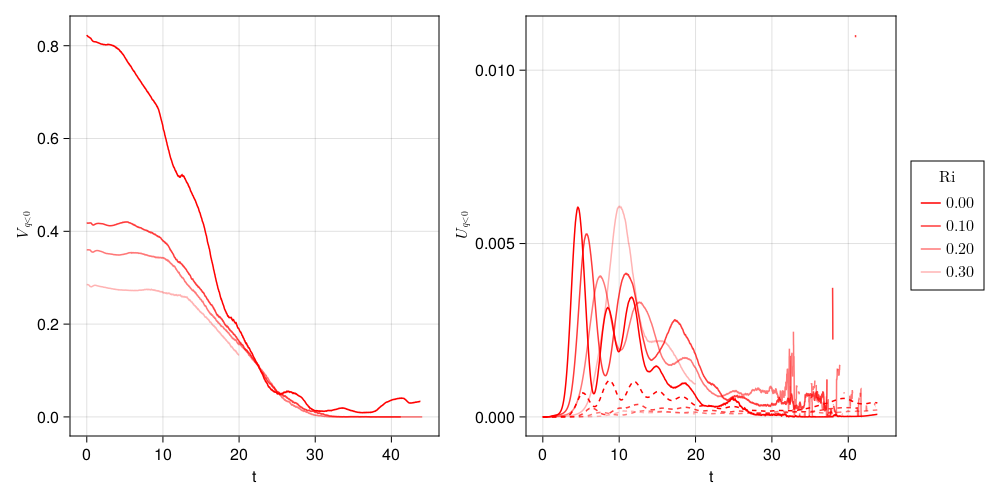

In [10]:
frontogenesis_pv_fig = frontogenesis_pv(runnames, legendtitle, runlabels; σ=16, resolution=(1000, 500))
#save("output/figures_new/frontogenesis_pv.png", frontogenesis_pv_fig)
#frontogenesis_pv_fig

# Streamfunction

## Term balance

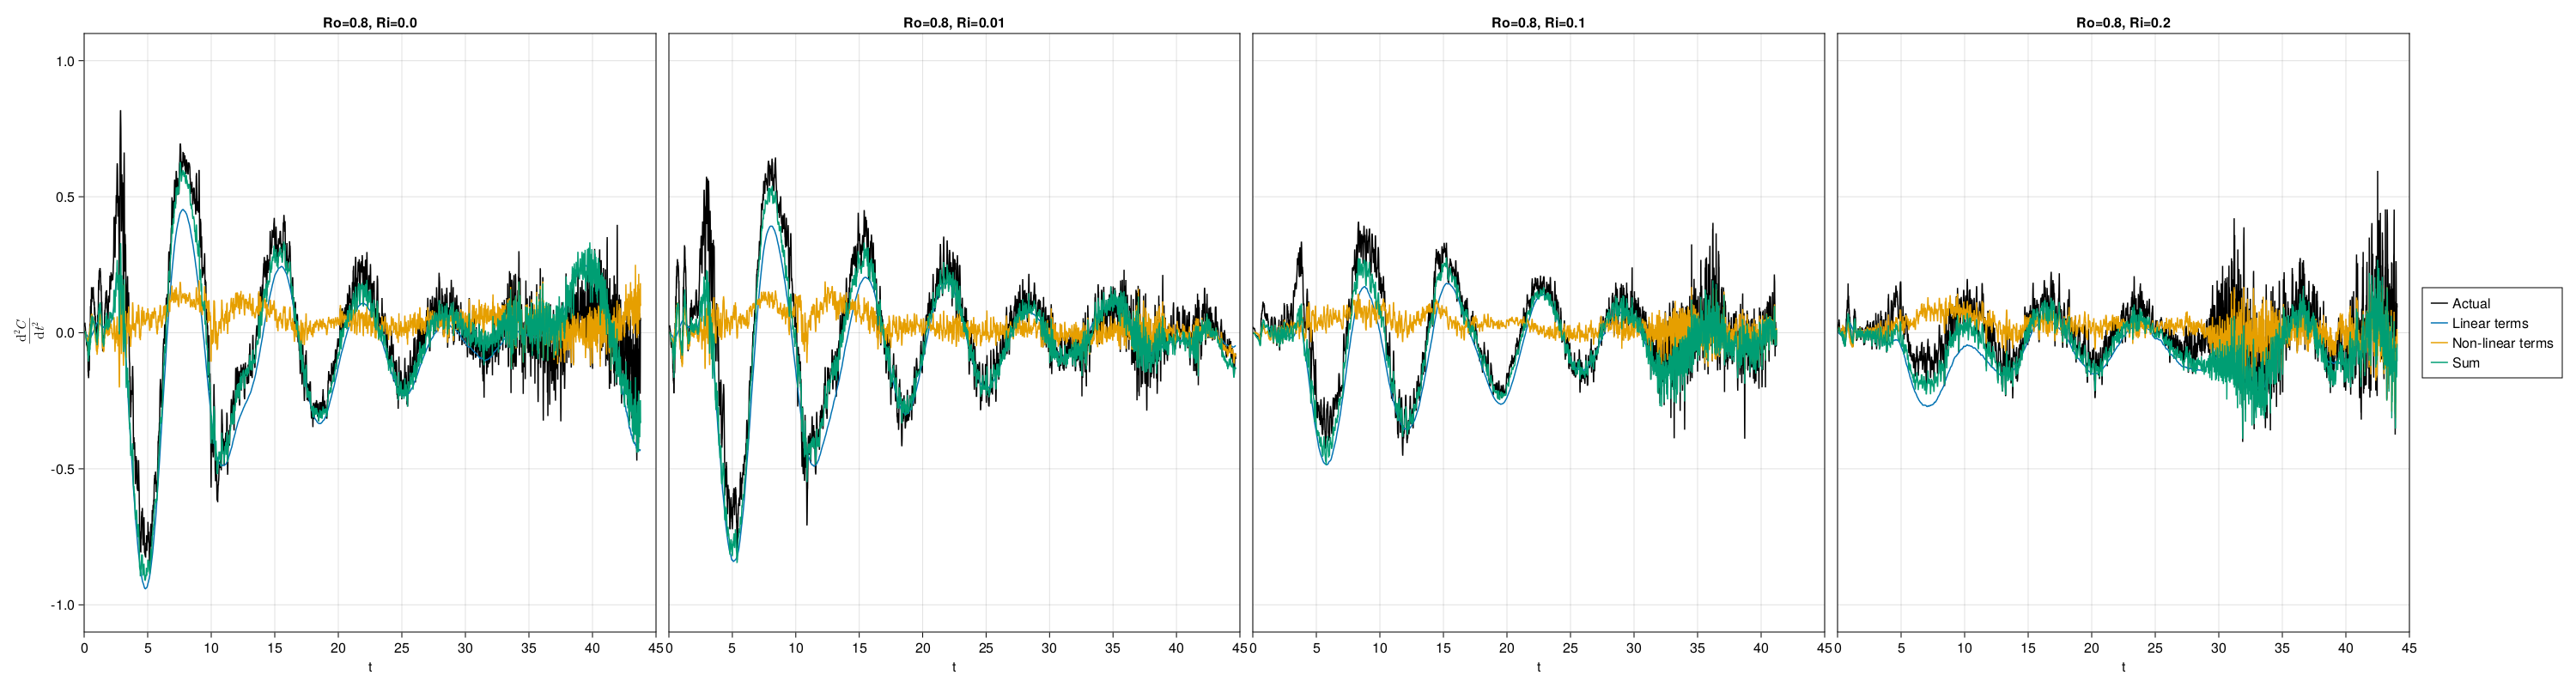

In [43]:
ψterms_fig = ψterms_plot(runnames; resolution=(3000, 800),  σ=0)
save("output/figures_new/streamfunction_terms.png", ψterms_fig)
ψterms_fig 

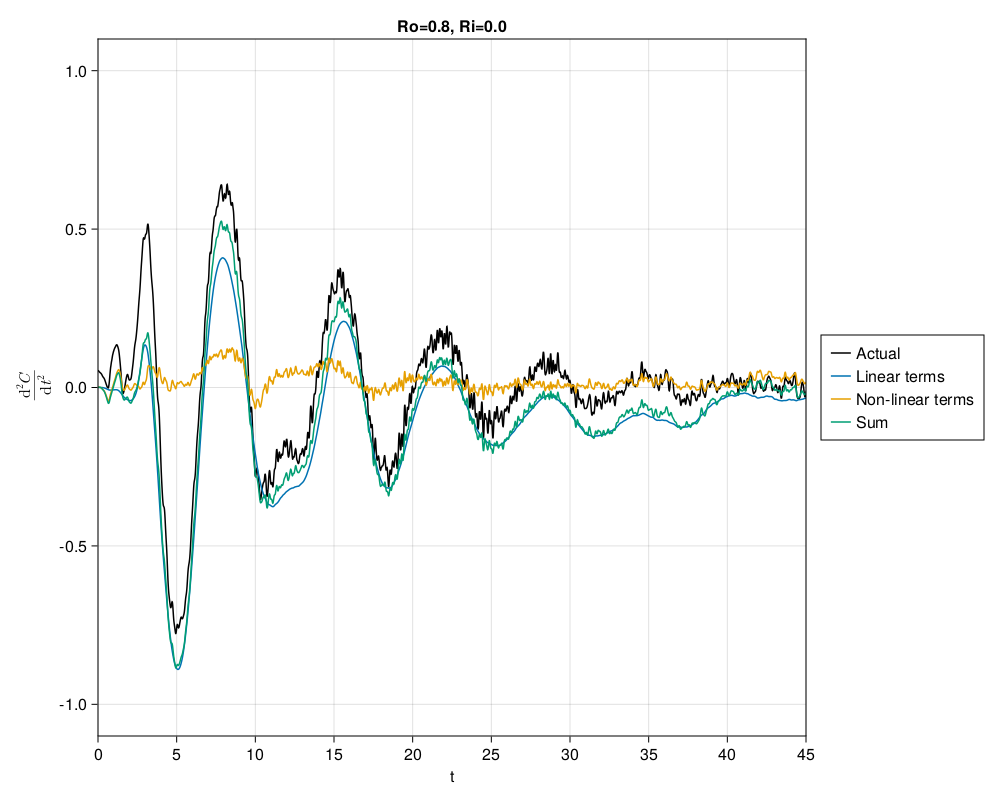

In [15]:
ψterms_fig5 = ψterms_plot([runname_long]; resolution=(1000, 800),  σ=5)
#save("output/figures_new/streamfunction_terms5.png", ψterms_fig5)
#ψterms_fig5

In [38]:
save("output/figures_new/streamfunction_terms.png", ψterms_fig; resolution=(4000, 500))

CairoMakie.Screen{IMAGE}


# State

## Horizontal

In [33]:
xy_states_figs = map(runnames) do runname 
    fig = xy_states(runname, [2, 3, 4, 5], [128]; resolution=(2000, 500), σ=3, field="v")
    save("output/figures_new/xy_states_surface_$runname.png", fig)
    fig
end

xy_states_figs = map(runnames) do runname 
    fig = xy_states(runname, [2, 3, 4, 5], 81:128; resolution=(2000, 500), σ=3, field="v")
    save("output/figures_new/xy_states_tophalf_$runname.png", fig)
    fig
end


xy_states_figs = map(runnames) do runname 
    fig = xy_states(runname, [2, 3, 4, 5], [128]; resolution=(2000, 500), σ=3, field="u")
    save("output/figures_new/xy_states_u_surface_$runname.png", fig)
    fig
end

xy_states_figs = map(runnames) do runname 
    fig = xy_states(runname, [2, 3, 4, 5], 81:128; resolution=(2000, 500), σ=3, field="u")
    save("output/figures_new/xy_states_u_tophalf_$runname.png", fig)
    fig
end

4-element Vector{Figure}:
 Figure()
 Figure()
 Figure()
 Figure()

## Vertical

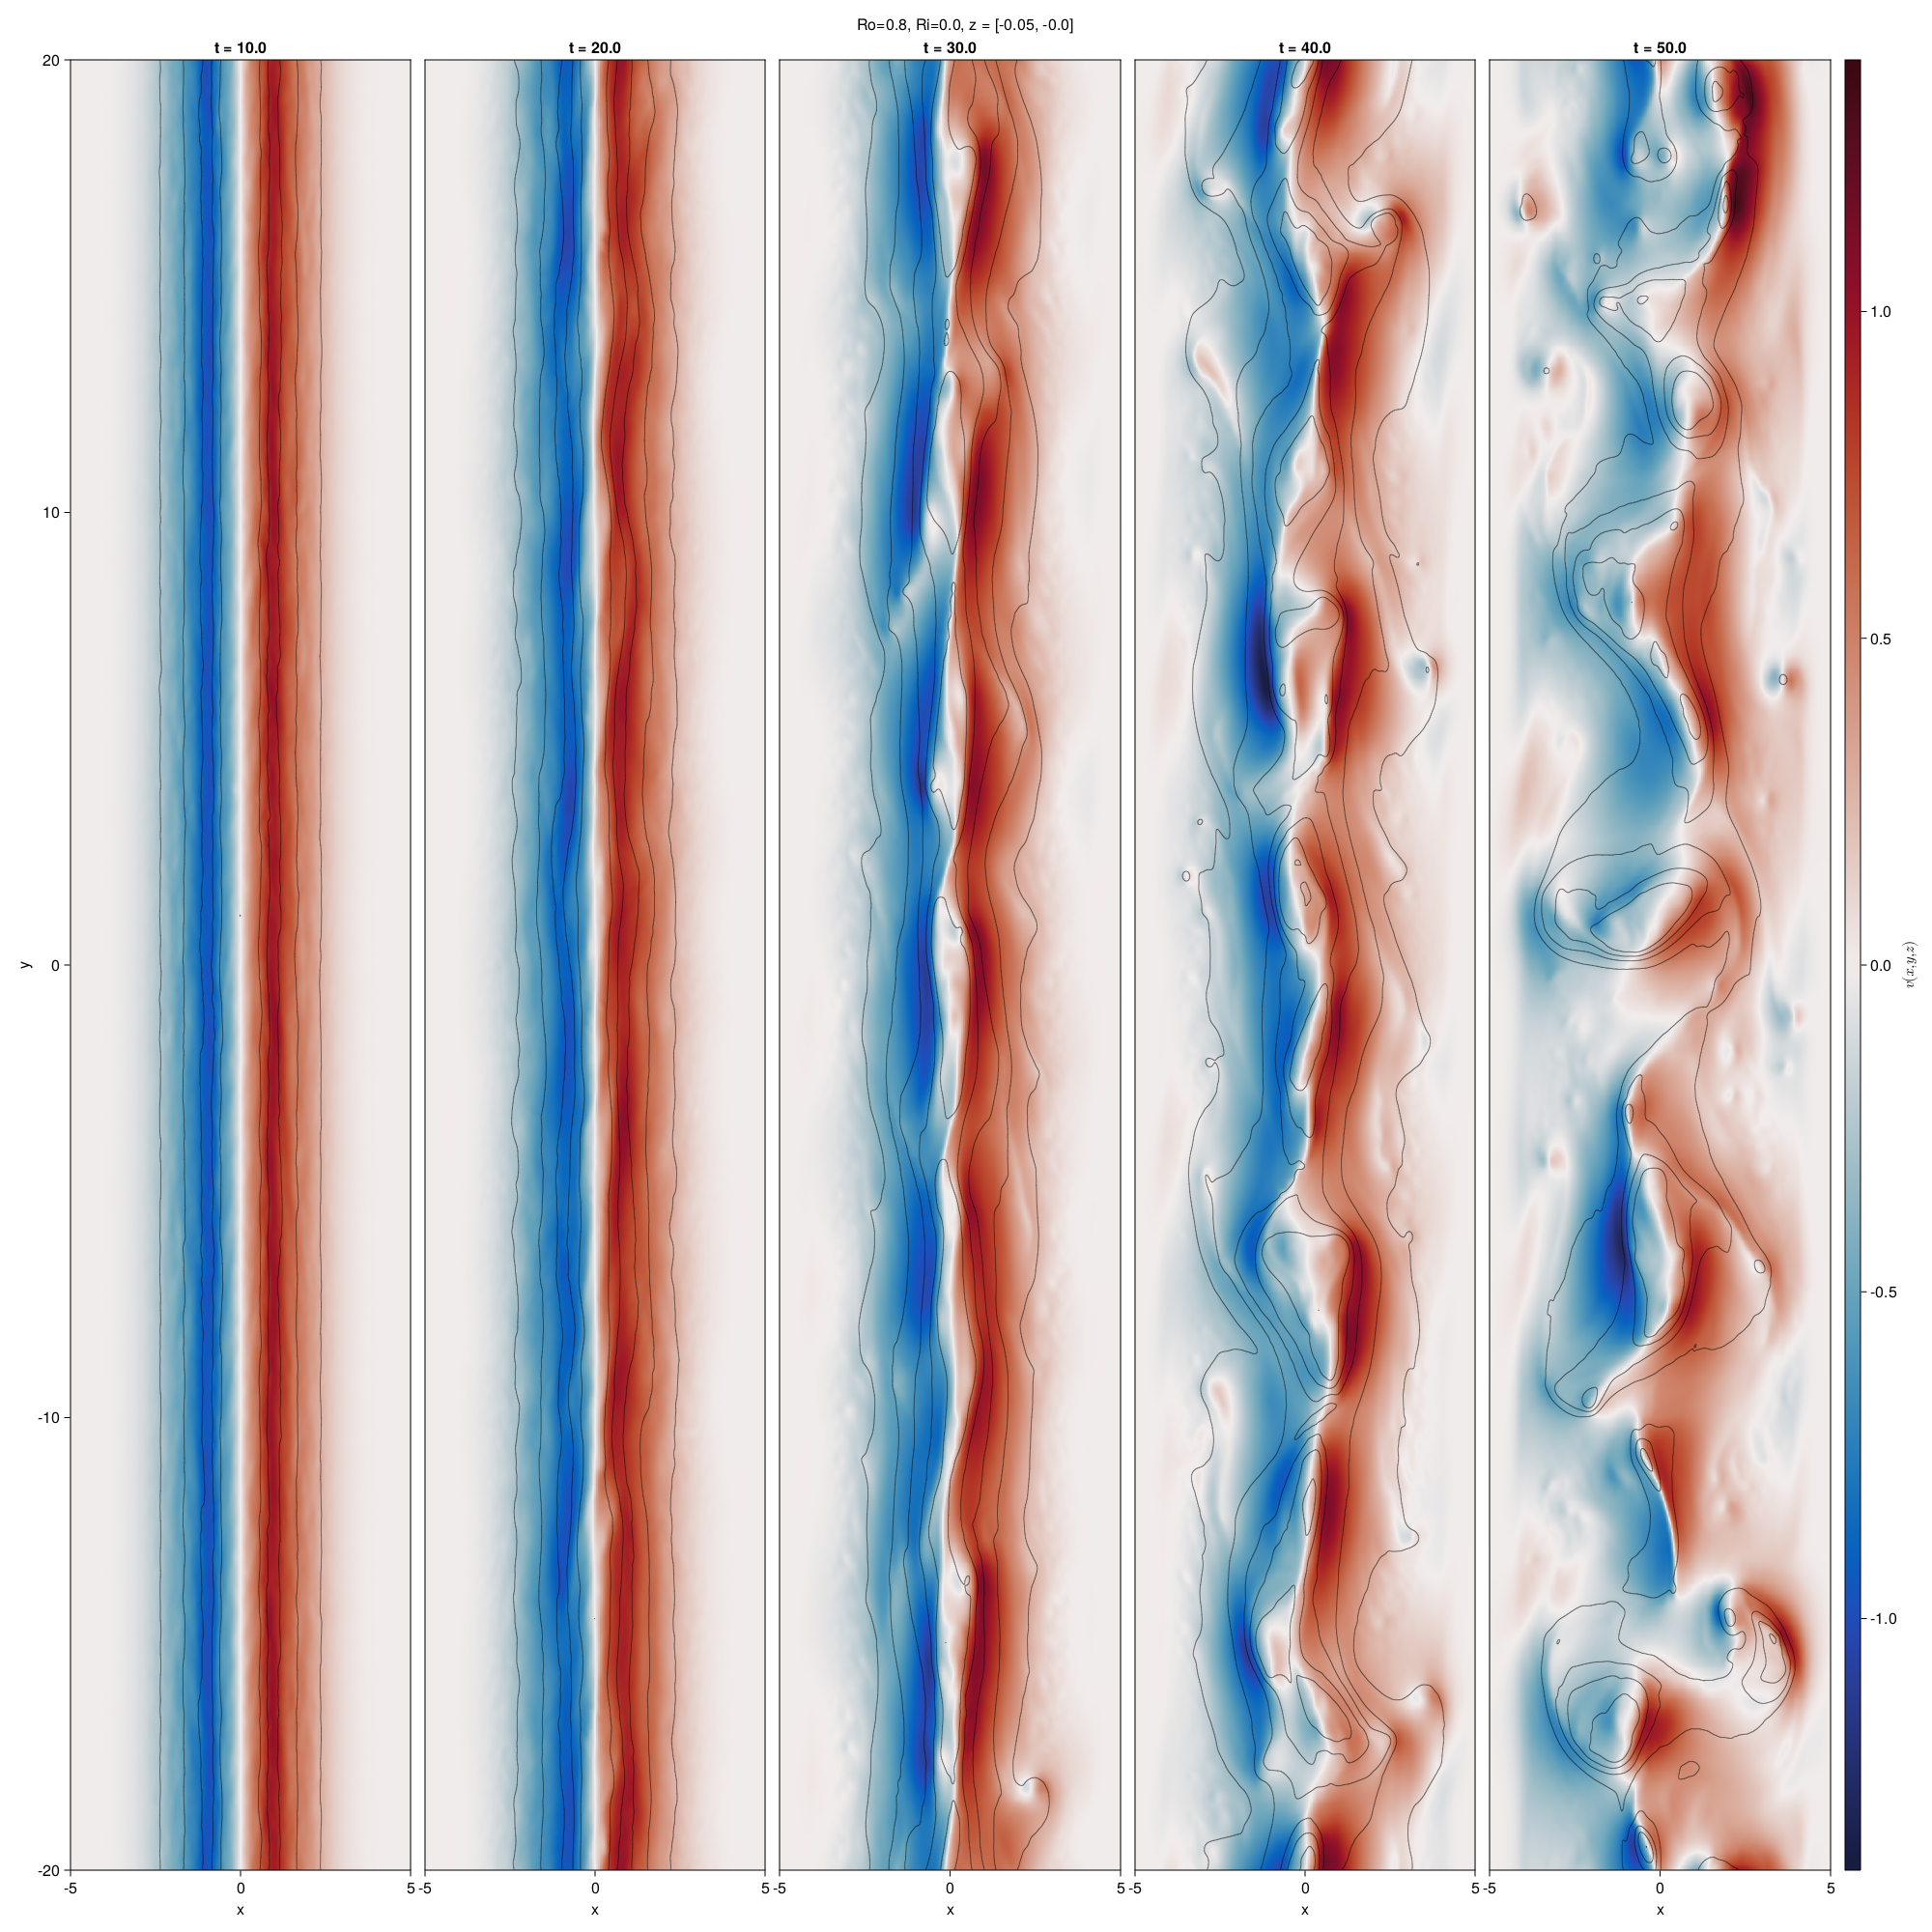

In [16]:
fig = xy_states(runname_long, [2, 3, 4, 5, 6], 81:128; resolution=(2000, 2000), σ=3, field="v")

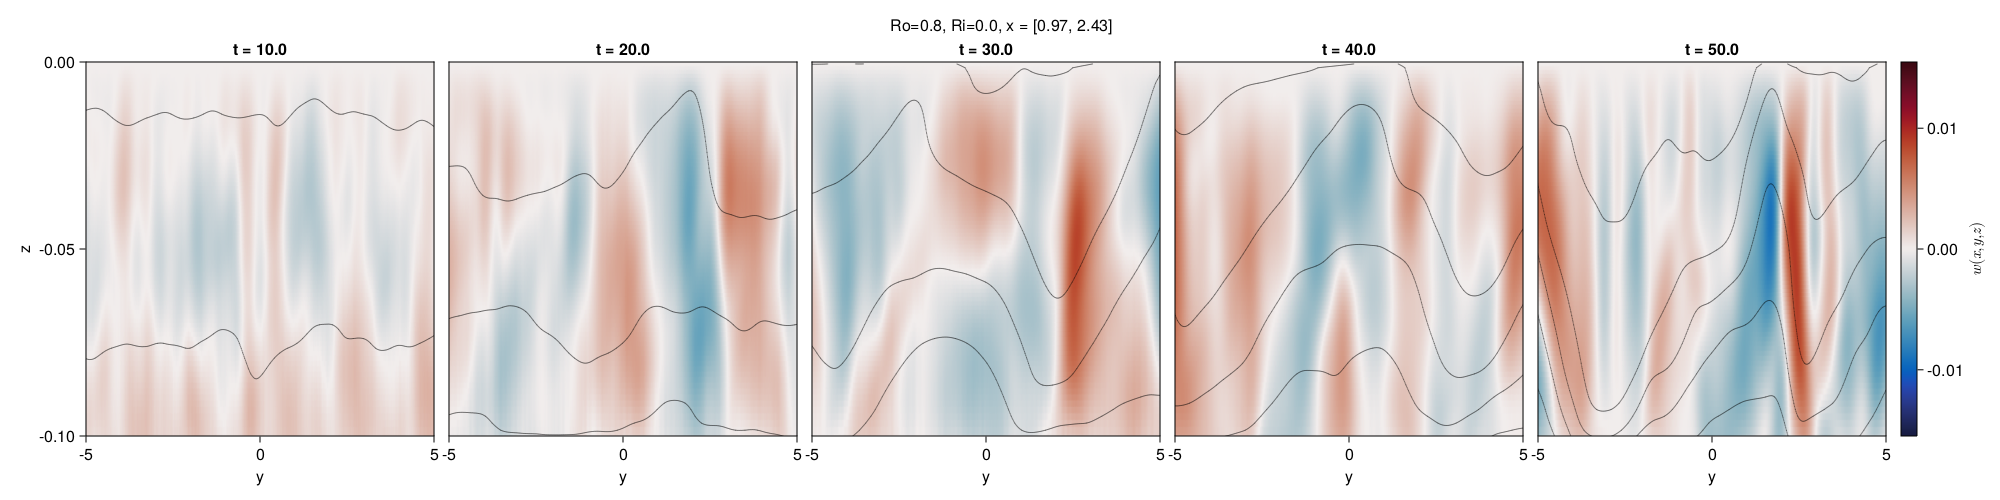

In [37]:
include("src/figures/yz_states.jl")
fig = yz_states(runname_long, [2, 3, 4, 5, 6], 256+50:256+125; resolution=(2000, 500), σ=8, field="w")

In [ ]:

include("src/figures/xyz_states.jl")
a = xyz_state_data(runnames[1], 2; σ=3, field="w")

In [59]:
file = jldopen("3dplot.jld2", "w")

JLDFile /gpfs/fs1/home/n/ngrisoua/atkin163/filament-instability/3dplot.jld2 (read/write)
  (no datasets)

In [64]:
close(file)

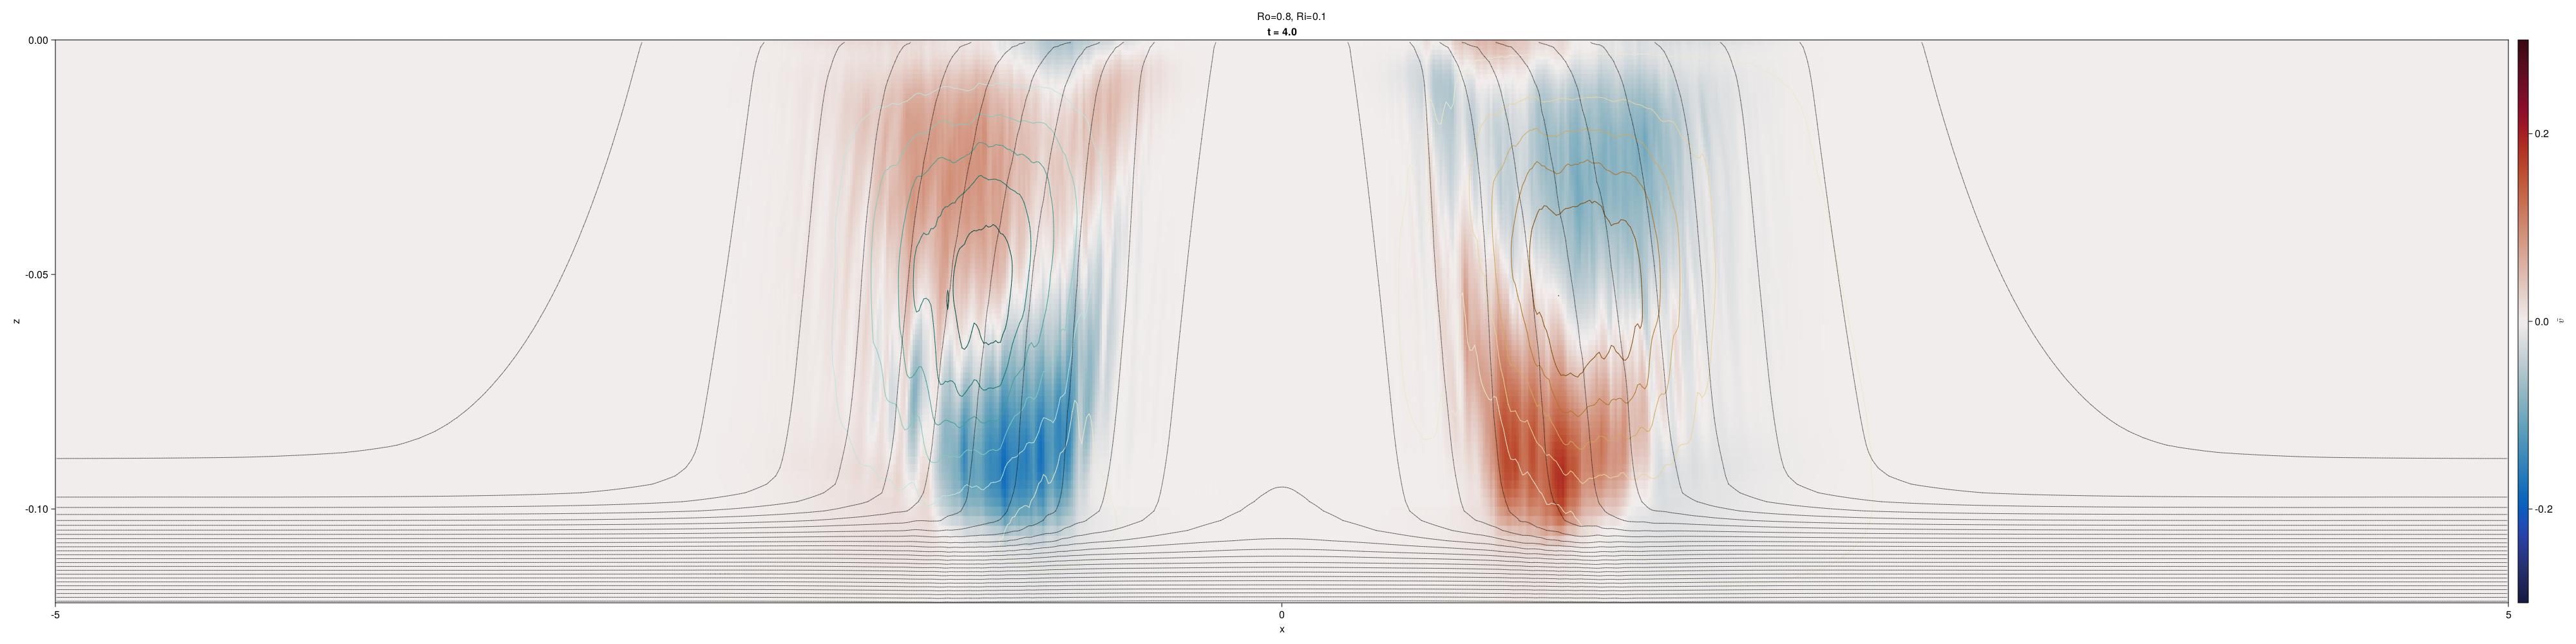

In [33]:
xz_states(runnames[2], [501]; resolution=(4000, 1000))